In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")
adaptive = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_adaptive.csv")

fixed["system"] = "Fixed"
adaptive["system"] = "Adaptive"

df = pd.concat([fixed, adaptive], ignore_index=True)

target = "waiting_time"
features = ["route_length", "depart_time", "duration", "time_loss"]

def train_models(df, system_name):
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        results.append({
            "System": system_name,
            "Model": name,
            "RMSE": rmse,
            "R2 Score": r2
        })

    return pd.DataFrame(results)




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\PycharmProjects\\DSGP_component_2\\data\\component2_traffic_fixed.csv'

In [19]:
results_fixed = train_models(fixed, "Fixed-Time")
results_adaptive = train_models(adaptive, "Adaptive")

results = pd.concat([results_fixed, results_adaptive])
print(results)


       System              Model       RMSE  R2 Score
0  Fixed-Time  Linear Regression  20.717399  0.997537
1  Fixed-Time      Random Forest  22.338987  0.997136
2  Fixed-Time  Gradient Boosting  21.142174  0.997435
0    Adaptive  Linear Regression  19.645761  0.996570
1    Adaptive      Random Forest  21.016836  0.996075
2    Adaptive  Gradient Boosting  20.246749  0.996357


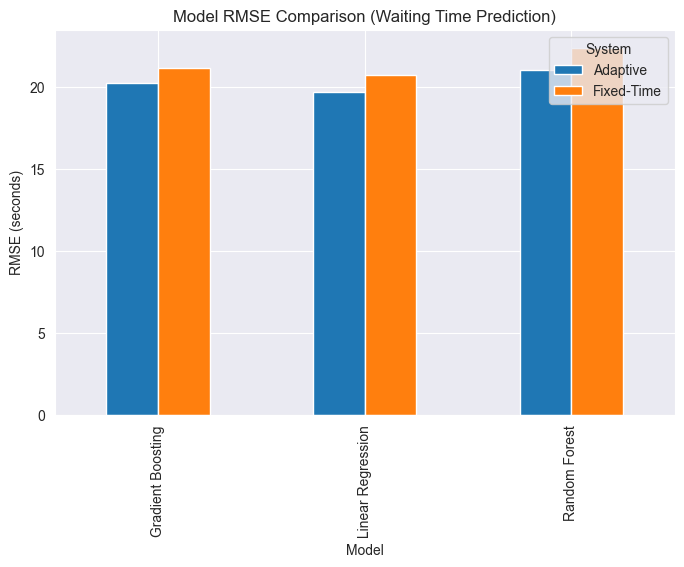

In [20]:
results.pivot(index="Model", columns="System", values="RMSE").plot(kind="bar", figsize=(8,5))
plt.title("Model RMSE Comparison (Waiting Time Prediction)")
plt.ylabel("RMSE (seconds)")
plt.show()

In [21]:
# Average metrics for Fixed-Time vs Adaptive
summary = df.groupby("system")[["duration", "waiting_time", "time_loss"]].mean().reset_index()
print("Average Metrics by System:")
print(summary)


Average Metrics by System:
     system    duration  waiting_time   time_loss
0  Adaptive  466.468614    209.603480  268.825165
1     Fixed  621.634538    364.848059  426.443059


In [22]:
# Use Gradient Boosting results 
rmse_comparison = results[results["Model"]=="Gradient Boosting"][["System","RMSE"]]
print("\nGradient Boosting RMSE Comparison:")
print(rmse_comparison)



Gradient Boosting RMSE Comparison:
       System       RMSE
2  Fixed-Time  21.142174
2    Adaptive  20.246749


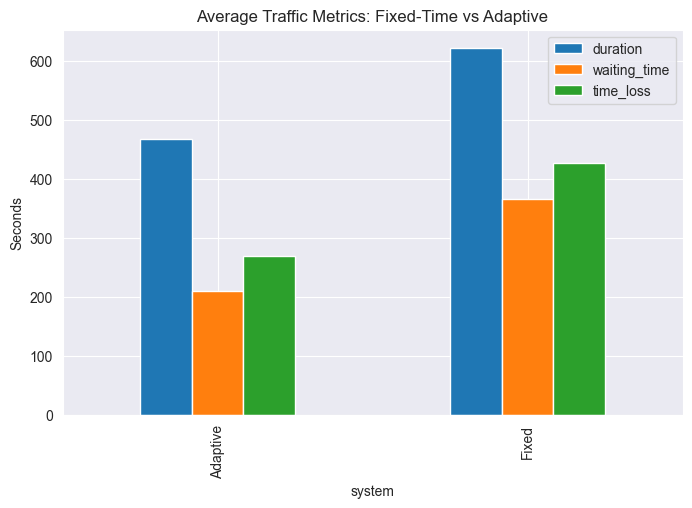

In [23]:
summary.set_index("system")[["duration", "waiting_time", "time_loss"]].plot(kind="bar", figsize=(8,5))
plt.title("Average Traffic Metrics: Fixed-Time vs Adaptive")
plt.ylabel("Seconds")
plt.show()


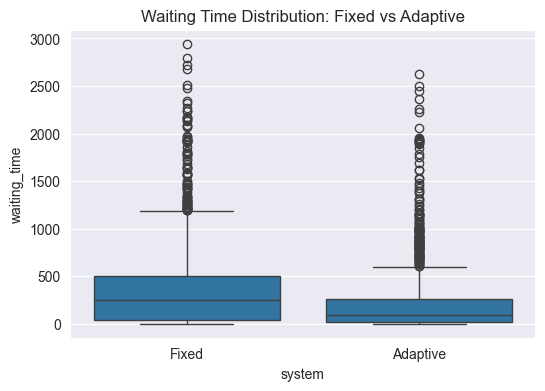

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="system", y="waiting_time", showfliers=True)
plt.title("Waiting Time Distribution: Fixed vs Adaptive")
plt.show()


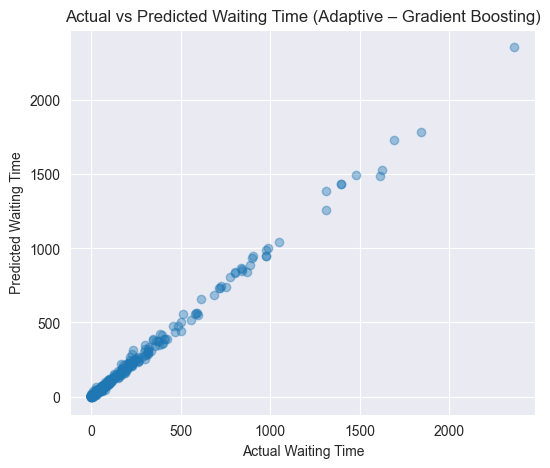

In [25]:
# Prepare Gradient Boosting for Adaptive system
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[df['system']=="Adaptive"][features]
y = df[df['system']=="Adaptive"][target]
X_scaled = scaler.fit_transform(X)

# Train Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred = gb.predict(X_test)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Waiting Time")
plt.ylabel("Predicted Waiting Time")
plt.title("Actual vs Predicted Waiting Time (Adaptive – Gradient Boosting)")
plt.show()


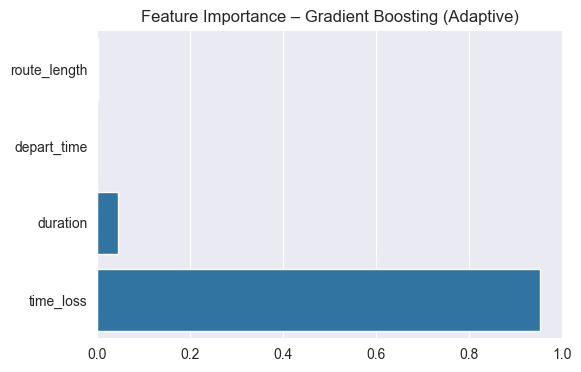

In [26]:
importances = gb.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance – Gradient Boosting (Adaptive)")
plt.show()
